# Day1.2 NeuralNetwork

### 실습 목표
- PyTorch를 사용해 Neural Network 모델을 구축해보기
- Shallow Neural Network와 Deep Neural Network의 차이를 확인하기

## 0. Setting

- 런타임 > 런타임 유형 변경 > GPU



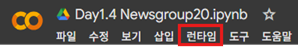

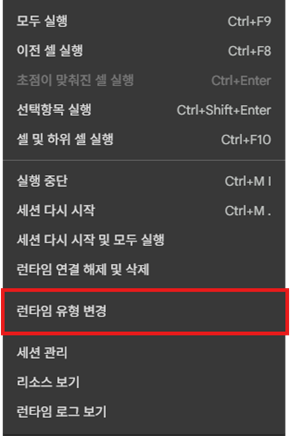

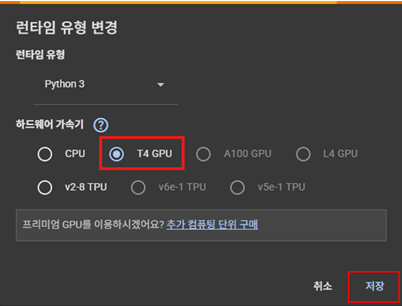

- 필요한 라이브러리 설치 및 호출

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

- GPU 설정

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


## 1. 데이터셋 준비

- 데이터셋은 Input(X)과 Label(Y)로 구성
  - Input(X) : 모델에게 입력으로 주어지는 값
  - Label(Y) : Input이 주어졌을 때, 모델이 예측해야 하는 정답 값
        (예시 1)
        Input(X) : 상품의 광고비, 할인율
        Label(Y) : 상품의 판매량

        (예시 2)
        Input(X) : 기온, 습도
        Label(Y) : 불쾌 지수
- 모델은 학습을 통해 데이터 셋의 **패턴**을 학습
- 이번 실습에서는 아래와 같은 데이터 셋을 사용

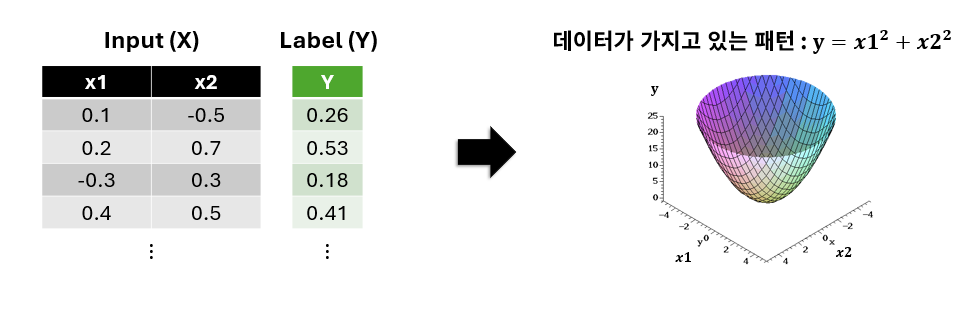

In [3]:
# 데이터 생성
x = torch.rand(1000, 2) * 2 - 1 # Input은 x1과 x2, 각각은 -1 에서 1 사이의 실수
y = (x[:, 0]**2 + x[:, 1]**2).unsqueeze(1) # Label은 y=x1^2+x2^2

- Train 데이터셋과 Test 데이터셋
  - Train 데이터셋 : 모델이 학습에 사용하는 데이터셋
  - Test 데이터셋 : 학습을 끝마친 모델이 얼마나 잘 예측하는지를 평가하기 위한 데이터셋
- 일반적으로 Train 데이터셋과 Test 데이터셋은 완벽히 분리되어 준비해야함
- 실습에선 준비한 1000개의 데이터 중 800개는 Train 데이터셋으로, 200개는 Test 데이터셋으로 사용

In [4]:
# Train 데이터셋
x_train = x[:800]
y_train = y[:800]

# Test 데이터셋
x_test = x[200:]
y_test = y[200:]

## 2. 모델 구축, 학습, 평가

#### 2.1 Shallow Neural Network 모델
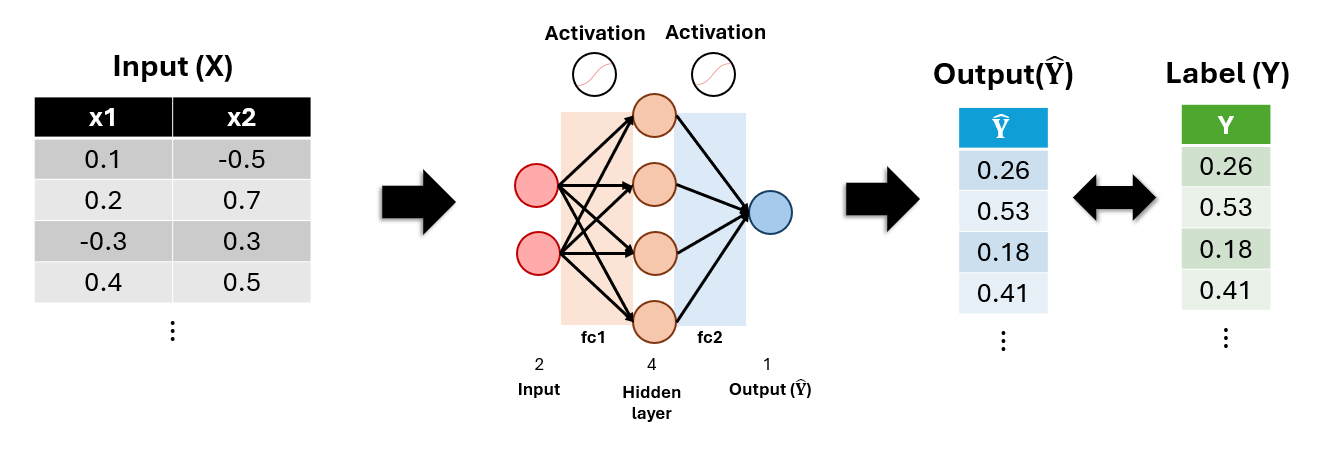
  - 총 2개의 fully connected layer로 구성된 Shallow한 Neural Network 모델을 정의
  - 각각의 fully connected layer는 Activation 함수를 포함
  - `nn.Module` 클래스를 상속받은 클래스로 정의됨
  - 주요 함수(메서드)
    - `__init__` : 모델 생성 시 실행되는 함수, 일반적으로 모델의 layer들을 정의
    - `forward` : 모델에 입력이 들어왔을 때, layer들을 통과시키고 그 결과를 반환하는 함수
  - Layer의 종류

    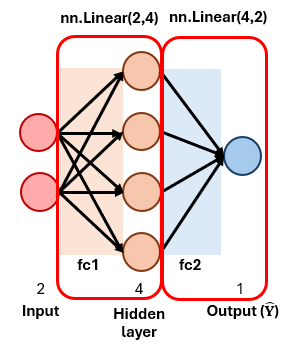

    - `nn.Linear(input_dim, output_dim)`
      - `input_dim` : 입력되는 데이터의 크기 (차원)
      - `output_dim` : layer를 통과하고 난 뒤 데이터의 크기 (차원)
    - `nn.ReLU()` : ReLU Activation 함수
  

In [5]:
class ShallowNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(2, 4)
        self.output = nn.Linear(4, 1)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.hidden(x))
        x = self.output(x)
        return x

- `nn.Sequential` : 다수의 layer를 하나로 묶어주는 클래스

In [6]:
class ShallowNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
          nn.Linear(2, 4),
          nn.ReLU(),
          nn.Linear(4, 1),
        )

    def forward(self, x):
        x = self.layers(x)
        return x

-  모델 학습 준비
  <details>
  <summary>상세 정보</summary>

  - Loss Function : 모델의 output이 실제 정답과 얼마나 유사한지를 나타내는 함수
  
    - 두 값이 서로 유사할수록 함수값이 작아지며, 이 함수를 최소화 하는 것이 모델의 최종 학습 목표

  - Optimizer : Loss function이 최소화되도록 모델의 Weight를 업데이트 하는 역할

  - Learning Rate : 모델이 Weight를 **얼마나** 업데이트 할 지를 결정하는 역할
  </details>

In [7]:
shallow_model = ShallowNN()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(shallow_model.parameters(), lr=0.1)

- 모델 학습 및 평가
  - 모델을 1번 학습할 때마다 성능을 평가

  - 성능 평가 지표 : Test Loss
    - 모델이 Test 데이터셋에 Input(X)를 입력받았을 때 해당 데이터의 라벨(Y)를 얼마나 잘 예측하는지를 평가 (낮을수록 좋은 성능)

<details>
<summary>상세 정보</summary>

- 학습 : Train 데이터셋으로, 모델의 output이 실제 정답과 유사해지도록, 즉 Loss function이 최소화되도록 Optimizer를 통해 학습

- 평가 : 학습한 모델이 Test 데이터셋의 라벨을 얼마나 잘 예측하는지 평가

</details>

In [8]:
# 모델을 학습할 횟수
num_epochs = 100

shallow_test_losses = []

for epoch in range(num_epochs):
    # 모델 학습
    shallow_model.train()
    y_pred = shallow_model(x_train)
    train_loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # 모델 평가
    shallow_model.eval()
    with torch.no_grad():
        test_pred = shallow_model(x_test)
        test_loss = criterion(test_pred, y_test)

    if (epoch + 1) % 10 == 0:
        shallow_test_losses.append(test_loss.item())
        print(f"모델을 {epoch+1}번 학습 했을 때의 Test Loss : {test_loss.item():.4f}")

print("모델 학습 완료!")

모델을 10번 학습 했을 때의 Test Loss : 0.1549
모델을 20번 학습 했을 때의 Test Loss : 0.1471
모델을 30번 학습 했을 때의 Test Loss : 0.1412
모델을 40번 학습 했을 때의 Test Loss : 0.1355
모델을 50번 학습 했을 때의 Test Loss : 0.1300
모델을 60번 학습 했을 때의 Test Loss : 0.1245
모델을 70번 학습 했을 때의 Test Loss : 0.1188
모델을 80번 학습 했을 때의 Test Loss : 0.1130
모델을 90번 학습 했을 때의 Test Loss : 0.1071
모델을 100번 학습 했을 때의 Test Loss : 0.1008
모델 학습 완료!


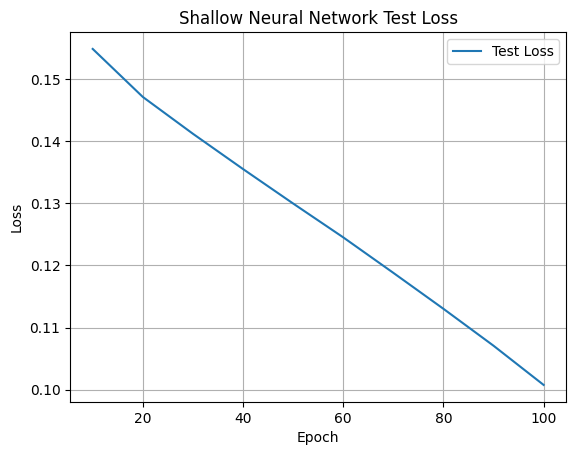

In [9]:
# Test Loss를 모델 학습 횟수별로 시각화
import matplotlib.pyplot as plt

epochs = list(range(10, num_epochs+1, 10))  # 10, 20, ..., 100

plt.plot(epochs, shallow_test_losses, label='Test Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Shallow Neural Network Test Loss")
plt.legend()
plt.grid(True)
plt.show()

#### 2.2 Deep Neural Network 모델

- 총 4개의 fully connected layer로 구성된 Deep한 Neural Network
- 각각의 fully connected layer는 Activation 함수를 포함

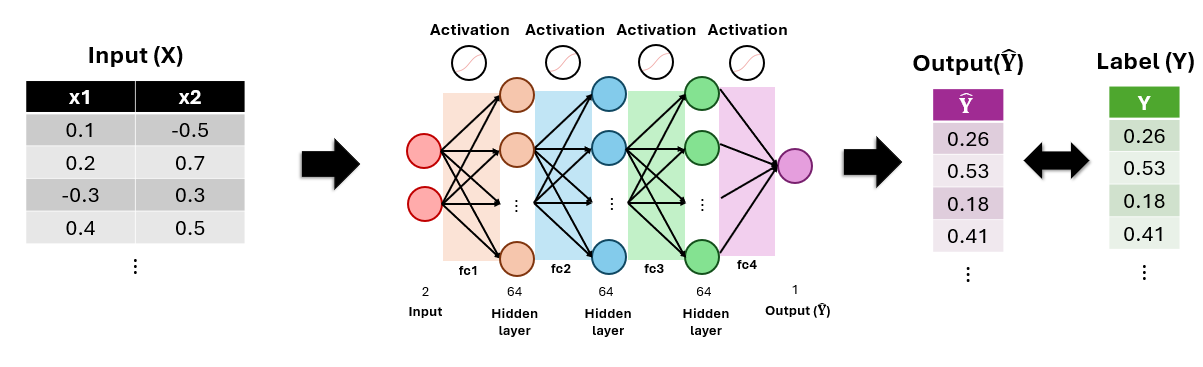

In [10]:
class DeepNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.net(x)

In [13]:
model = DeepNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

num_epochs = 100

deep_test_losses = []

for epoch in range(num_epochs):
    # 🔹 학습 모드
    model.train()
    y_pred = model(x_train)
    train_loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # 🔹 평가 모드
    model.eval()
    with torch.no_grad():
        test_pred = model(x_test)
        test_loss = criterion(test_pred, y_test)

    # 🔹 10epoch마다 기록
    if (epoch + 1) % 10 == 0:
        deep_test_losses.append(test_loss.item())
        print(f"모델을 {epoch+1}번 학습 했을 때의 Test Loss : {test_loss.item():.4f}")

print("모델 학습 완료!")

모델을 10번 학습 했을 때의 Test Loss : 0.0996
모델을 20번 학습 했을 때의 Test Loss : 0.0273
모델을 30번 학습 했을 때의 Test Loss : 0.0045
모델을 40번 학습 했을 때의 Test Loss : 0.0039
모델을 50번 학습 했을 때의 Test Loss : 0.0017
모델을 60번 학습 했을 때의 Test Loss : 0.0014
모델을 70번 학습 했을 때의 Test Loss : 0.0009
모델을 80번 학습 했을 때의 Test Loss : 0.0007
모델을 90번 학습 했을 때의 Test Loss : 0.0005
모델을 100번 학습 했을 때의 Test Loss : 0.0004
모델 학습 완료!


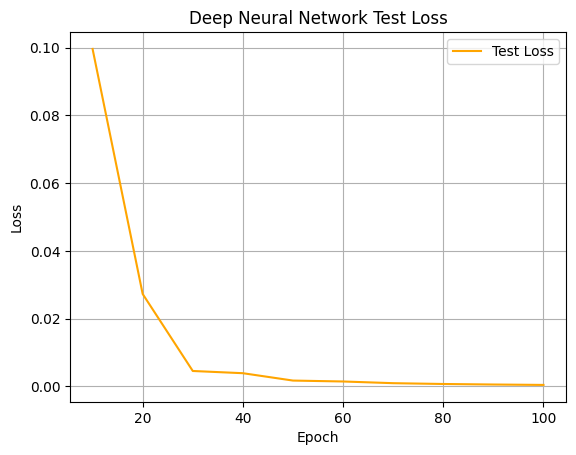

In [14]:
import matplotlib.pyplot as plt

epochs = list(range(10, num_epochs+1, 10))  # 10, 20, ..., 100

plt.plot(epochs, deep_test_losses, label='Test Loss', color='orange')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Deep Neural Network Test Loss")
plt.legend()
plt.grid(True)
plt.show()

- Shallow Neural Network vs. Deep Neural Network 성능 비교
  - Shallow Neural Network에 비해 Deep Neural Network가 더 낮은 Test Loss를 보여주며 성능이 우수함

  - 단, 항상 Deep 구조가 더 좋은 것은 아니며, 문제의 복잡도와 데이터에 따라 적절한 층 수와 구조를 선택하는 것이 중요함

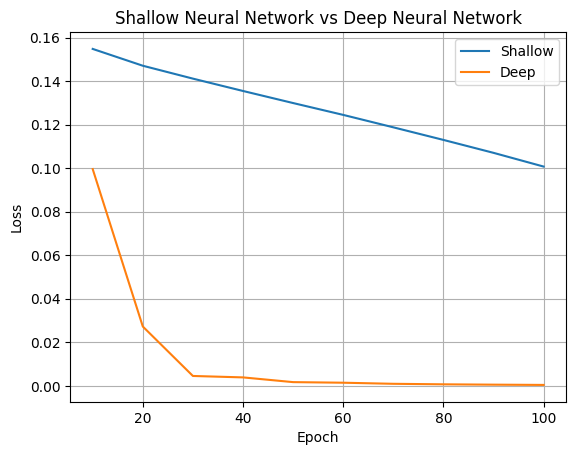

In [15]:
import matplotlib.pyplot as plt

epochs = list(range(10, num_epochs+1, 10))  # 10, 20, ..., 100

plt.plot(epochs, shallow_test_losses, label='Shallow')
plt.plot(epochs, deep_test_losses, label='Deep')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Shallow Neural Network vs Deep Neural Network")
plt.legend()
plt.grid(True)
plt.show()